In [44]:
import pandas as pd
import matplotlib

In [128]:
# mycolumns = [
#     'data','platform','lang',
#     'pixeldata.read','pixeldata.read.init','pixeldata.read.pixels',
#     'pixeldata.write','pixeldata.write.init','pixeldata.write.pixels']
# d = pd.DataFrame(columns=mycolumns)
d = pd.DataFrame()

for data in ['bbbc', 'mitocheck']:
    for platform in ['win', 'linux']:
        for lang in ['cpp', 'java']:
            if lang == 'java':
                name_col = 'test.lang'
            else:
                name_col = 'test.name'
            file_name = 'results/' + data + '-pixeldata-' + platform + '-' + lang + '.tsv'
            table = pd.read_table(file_name,dtype={name_col: str})
            
            col = lang + ' ' + data + ' ' + platform
            
            if lang == 'java':
                m = table.groupby(['test.name']).mean()
                d[col] = m['real']
#                 d.loc[i] =m['real'].transpose()
            else:
                m = table.groupby(['test.lang']).mean()
                d[col] = m['test.file']
#                 d.loc[i] =m['test.file'].transpose()
#             d.loc[i]['data'] = data
#             d.loc[i]['platform'] = platform
#             d.loc[i]['lang'] = lang
            
d

,cpp bbbc win,java bbbc win,cpp bbbc linux,java bbbc linux,cpp mitocheck win,java mitocheck win,cpp mitocheck linux,java mitocheck linux
test.lang,,,,,,,,
pixeldata.read,764210.0,154155.0,178943.333333,97849.666667,72975.0,2231.2,56796.666667,1550.000000
pixeldata.read.init,448454.4,2429.2,112620.000000,1594.000000,71956.8,682.8,56123.333333,602.666667
pixeldata.read.pixels,315755.6,151725.4,66323.333333,96254.666667,1018.2,1548.2,673.333333,946.666667
pixeldata.write,1757503.0,443470.6,195443.333333,135666.000000,119330.6,12007.8,12223.333333,5280.666667
pixeldata.write.init,2302.8,5.2,2026.666667,6.666667,1749.2,0.8,1636.666667,1.000000
pixeldata.write.pixels,1755200.2,443464.8,193416.666667,135658.333333,117581.4,12006.8,10586.666667,5279.333333


In [132]:
d.transpose()
# d.loc[d['test.lang'] == 'pixeldata.read']

test.lang,pixeldata.read,pixeldata.read.init,pixeldata.read.pixels,pixeldata.write,pixeldata.write.init,pixeldata.write.pixels
cpp bbbc win,764210.000000,448454.400000,315755.600000,1.757503e+06,2302.800000,1.755200e+06
java bbbc win,154155.000000,2429.200000,151725.400000,4.434706e+05,5.200000,4.434648e+05
cpp bbbc linux,178943.333333,112620.000000,66323.333333,1.954433e+05,2026.666667,1.934167e+05
java bbbc linux,97849.666667,1594.000000,96254.666667,1.356660e+05,6.666667,1.356583e+05
cpp mitocheck win,72975.000000,71956.800000,1018.200000,1.193306e+05,1749.200000,1.175814e+05
java mitocheck win,2231.200000,682.800000,1548.200000,1.200780e+04,0.800000,1.200680e+04
cpp mitocheck linux,56796.666667,56123.333333,673.333333,1.222333e+04,1636.666667,1.058667e+04
java mitocheck linux,1550.000000,602.666667,946.666667,5.280667e+03,1.000000,5.279333e+03


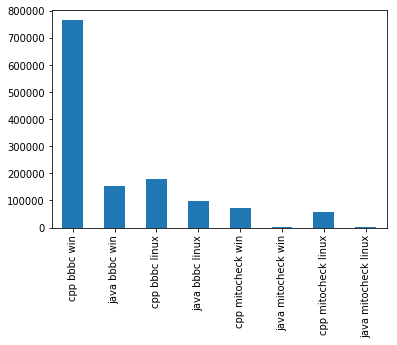

In [133]:
import matplotlib.pyplot as plt
plt.figure()

d.loc['pixeldata.read'].plot(kind='bar')
plt.show()

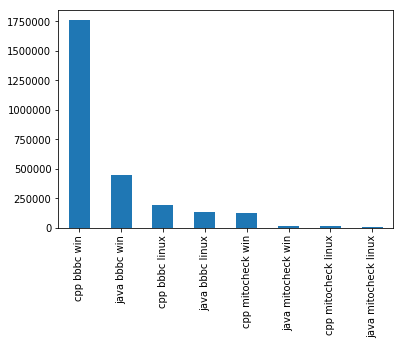

In [134]:
import matplotlib.pyplot as plt
plt.figure()

d.loc['pixeldata.write'].plot(kind='bar')
plt.show()